In [1]:
# Importing Modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn' -- disabling chain assignment warning
# Coz it was annoying af (https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

In [2]:
# Importing Dataset

df = pd.read_csv('vgsales.csv')

In [3]:
# A view at the Data

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### We can see that the dataset contains 16,600 gaming companies along with their basic info and Sales in different geographical region.

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### We can see the Data has 271 null values for Year and 58 for Publisher.

271 out of 16600 is 1.63% and 58 out of 16600 is 0.34%
So we can drop these rows without losing much of the info.

(We would be using Imputation if the percentage would have been too big.)

In [5]:
df = df.dropna()

In [6]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Now we don't have any null value so we can move forward.

In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Feature Engineering

In [9]:
df['unsoldInventory'] = 100 - df['Global_Sales']
df['avgSales'] = df['Global_Sales'] / 4

In [10]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'unsoldInventory', 'avgSales'],
      dtype='object')

In [11]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,unsoldInventory,avgSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,17.26,20.6850
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,59.76,10.0600
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,64.18,8.9550
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,67.00,8.2500
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.63,7.8425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,99.99,0.0025
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,99.99,0.0025
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,99.99,0.0025
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,99.99,0.0025


In [12]:
# Checking if we might have any duplicate data.

df.duplicated().values.any()

False

### I have added 2 features which might help in proper distribution and better prediction of values

- Unsold Inventory of Companies
- Average Sales throughout the world

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,unsoldInventory,avgSales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,17.26,20.6850
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,59.76,10.0600
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,64.18,8.9550
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,67.00,8.2500
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.63,7.8425


In [14]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,unsoldInventory,avgSales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01,99.99,0.0025
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01,99.99,0.0025
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01,99.99,0.0025
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01,99.99,0.0025
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01,99.99,0.0025


In [15]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,unsoldInventory,avgSales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910,99.459090,0.135228
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345,1.567345,0.391836
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,17.260000,0.002500
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,99.520000,0.015000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,99.830000,0.042500
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,99.940000,0.120000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,99.990000,20.685000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             16291 non-null  int64  
 1   Name             16291 non-null  object 
 2   Platform         16291 non-null  object 
 3   Year             16291 non-null  float64
 4   Genre            16291 non-null  object 
 5   Publisher        16291 non-null  object 
 6   NA_Sales         16291 non-null  float64
 7   EU_Sales         16291 non-null  float64
 8   JP_Sales         16291 non-null  float64
 9   Other_Sales      16291 non-null  float64
 10  Global_Sales     16291 non-null  float64
 11  unsoldInventory  16291 non-null  float64
 12  avgSales         16291 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.7+ MB


In [17]:
df.shape

(16291, 13)

#### The Dataset is spread across 16291 rows and 13 columns

In [18]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'unsoldInventory', 'avgSales'],
      dtype='object')

### The different features of our Dataset are:

1. Rank 
2. Name 
3. Platform
4. Year
5. Genre
6. Publisher
7. Sales in North America
8. Sales in Europe
9. Sales in Japan
10. Sales in all other countries 
11. Total Sales Globally
12. Unsold Inventory of the Business
13. Average Sales Globally

# Data Visualization

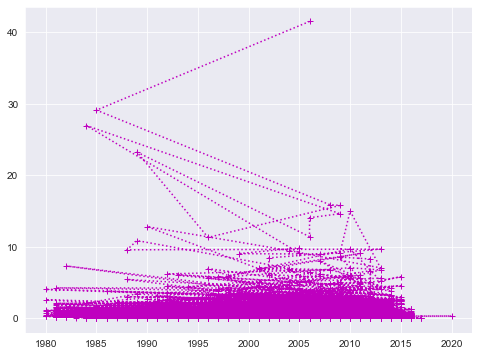

In [19]:
sns.set_style('darkgrid');

plt.figure(figsize=(8,6))
plt.plot(df.Year, df.NA_Sales, '+:m');

#### From this North America Sales based on year we can conclude:
- Sales were at the highest point during 2008-2010
- It decreased a lot after that so we might investigate the reason

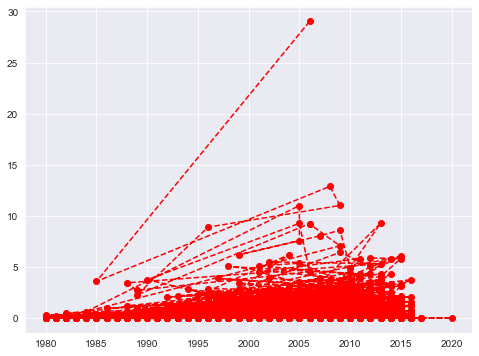

In [20]:
plt.figure(figsize=(8,6))
plt.plot(df.Year, df.EU_Sales, 'o--r');

#### From this Eurpose Sales based on year we can conclude:
- Sales were at the highest point during 2006-2008
- It became pretty much unpredictable after that, need to do ground research

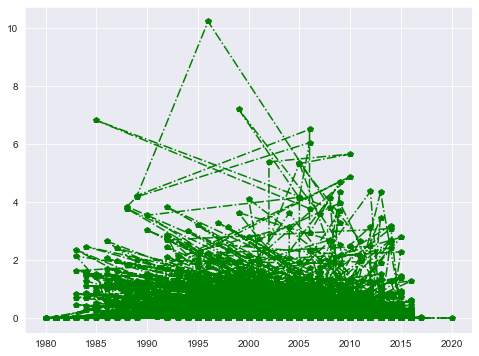

In [21]:
plt.figure(figsize=(8,6))
plt.plot(df.Year, df.JP_Sales, 'p-.g');

#### From this North America Sales based on year we can conclude:
- Sales were at the highest point during 1995-1998
- It decreased a lot after that so we might investigate the reason

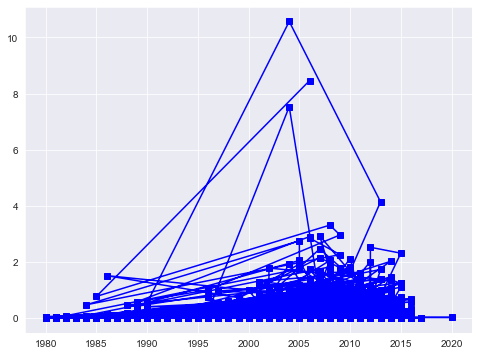

In [22]:
plt.figure(figsize=(8,6))
plt.plot(df.Year, df.Other_Sales, 's-b');

#### From this Other Sales based on year we can conclude:
- Sales were at the highest point during 2003-2005
- It decreased a lot after that so we might investigate the reason

C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


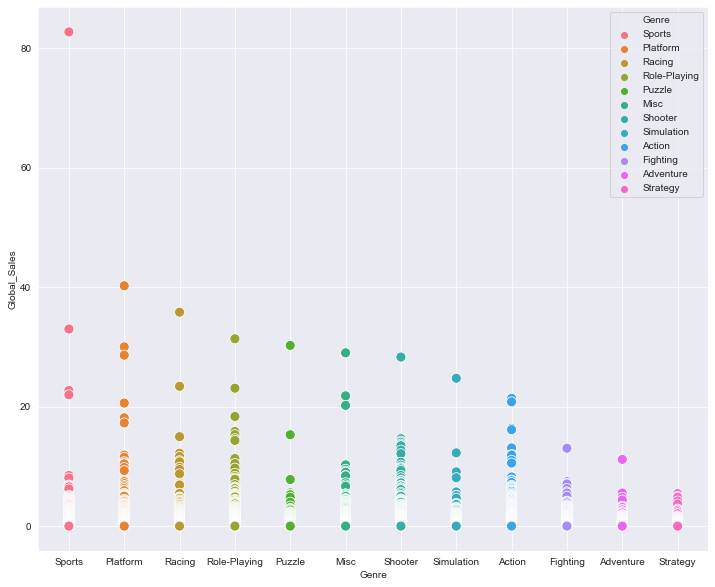

In [23]:
plt.figure(figsize=(12,10))
sns.scatterplot(df.Genre,df.Global_Sales,hue=df.Genre,s=100);

#### From this scatterplot, we can conclude:
1. Sports Genre had the most Global Sales
2. Strategy Genre had the least Global Sales

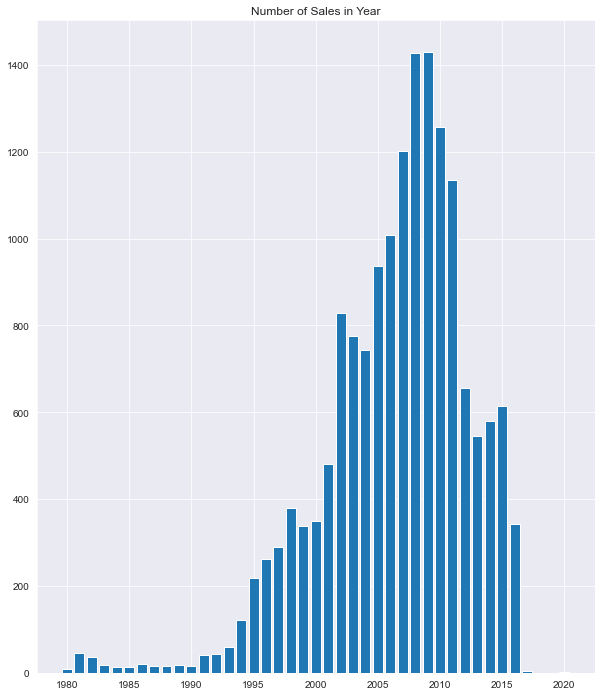

In [24]:
plt.figure(figsize = (10,12))
plt.bar(df["Year"].value_counts().index, df["Year"].value_counts())
plt.title("Number of Sales in Year")
plt.show()

#### By this chart we can conclude, Games were at the peak during 2008-2009